# Occurrence Data for <i>Alternanthera Philoxeroides</i>

In [1]:
#Required packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from fiona.crs import from_epsg
from shapely.ops import cascaded_union
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects import Formula
pandas2ri.activate()

E:\spatial\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


<p style='text-align: justify;'>The occurrence data would be downloaded from the Global Biodiversity Information Facility (www.gbif.org). We basically require the longitude and latitudue of the locations where the plant was found. R provides inbuilt functions that allows the user to access the database and extract the information. We extracted data by calling R package using library <code>rpy2</code>within the Python environment. </p>

<p style='text-align: justify;'>The module <code>robjects</code> of library <code>rpy2</code> help us to use the same code as we use in R language inside the <code> ro.r(' ')</code>. For data processing we need to install two packages from R, namely, <i>dismo</i> and <i>jsonlite</i>. We need <i>jsonlite</i> because data contains geographical coordinates. It does mapping between the R objects and JSON data. The function <code>importr</code> of library <code>rpy2</code> imports installed R packages in python environment.</p>

#### Installing R packages

In [2]:
ro.r('install.packages("dismo",dependencies = TRUE)')
ro.r('install.packages("jsonlite", dependencies = TRUE)')

rpy2.rinterface.NULL

#### Importing R packages

In [3]:
dismo = importr("dismo")
utils = importr("utils")

Download occurrence records from Global Biodiversity Information Facility (GBIF) using function <code>gbif</code> of package <code>dismo</code>.

In [4]:
invasive = dismo.gbif(genus = 'Alternanthera', species = 'philoxeroides', geo = True, removeZeros = True)

Saving Occurrence data in file.

In [5]:
utils.write_csv(x = invasive, file = "Alternanthera.csv", fileEncoding = "UTF-8")

Reading saved file.

In [6]:
alty_gbif = pd.read_csv('Alternanthera.csv')

Selecting only required columns (species, longitude and latitude) from dataframe.

In [7]:
alty_gbif = alty_gbif[['species','lon','lat']]

Removing rows with na

In [8]:
alty_gbif = alty_gbif.dropna(axis=0)

Data collected from https://indiabiodiversity.org and one data is from Research paper (Asim Mandal and Amal Kumar Mondal, 2011) which is of June 2009 to October 2009 in Paschim Medinipur district (Lat. 22 degree 27′N & Lon. 87 degree 20′ E) on 25 Aug, 2019

In [9]:
others=pd.DataFrame({'species':np.repeat('Alternanthera philoxeroides',16), 'lon':[91.98815, 90.56, 80.19911, 92.67727, 91.67121, 76.33885, 76.36837,76.401344, 94.89688, 76.38788, 79.81138, 76.36382, 77.60254, 73.03711,77.74995, 87.3333],
                     'lat':[23.940847, 26.48, 13.170984, 26.49323, 26.203083, 9.498067, 9.500874,9.463821, 27.449646,9.481674, 11.947042,9.594826, 12.870265, 20.055931, 12.9698, 22.45]})

GBIF data and above collected data has concatenated for future use.

In [10]:
alty_gbif_oth=alty_gbif.append(others, sort=True)

Data collected from https://www.cabi.org. on 24, Aug 2019. The downloaded file has data for all over the world. But our region of interest is India. So we are collecting data only from India.

In [11]:
cabi_occur = gpd.read_file('Alternanthera_philoxeroides.csv')
Ind_occur = cabi_occur[18:50]

In [12]:
cabi_alty=pd.DataFrame({'species':np.repeat('Alternanthera philoxeroides', len(Ind_occur)), 'lon': Ind_occur.Longitude.astype(float),'lat': Ind_occur.Latitude.astype(float)})

Conactenating previous concatenated data and collected data from CABI

In [13]:
alty_gbif_cbai=alty_gbif_oth.append(cabi_alty, sort=True)
alty_gbif_all=alty_gbif_cbai.set_index([pd.Index(np.arange(0,len(alty_gbif_cbai)))])
alty_gbif = alty_gbif_all

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Converting DataFrame into GeoDataFrame

In [14]:
#Required packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from fiona.crs import from_epsg
from shapely.ops import cascaded_union
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects import Formula
pandas2ri.activate()

E:\spatial\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


CRS- Coordinate Reference System, explain relation between coordinates of map to the earth surface. Previously, we were using different format to define crs in python <code> {'init':'epsg :4326'} </code>. But now the update version of python has <code>{'init': 'epsg:4326', 'no_defs': True}</code> this format. 

In [16]:
from_epsg(4326)

{'init': 'epsg:4326', 'no_defs': True}

In [17]:
alty_gbif = pd.read_csv('alty_gbif.csv')
geometry =[Point(xy) for xy in zip(alty_gbif.lon.values, alty_gbif.lat.values)]
crs = from_epsg(4326)
alty_gbif = gpd.GeoDataFrame(alty_gbif, crs=crs, geometry = geometry)
alty_gbif.head()

,species,lon,lat,geometry
1,Alternanthera philoxeroides,174.534784,-35.623341,POINT (174.53478 -35.62334)
2,Alternanthera philoxeroides,174.533840,-35.622136,POINT (174.53384 -35.62214)
3,Alternanthera philoxeroides,174.705837,-36.917413,POINT (174.70584 -36.91741)
4,Alternanthera philoxeroides,120.790303,24.407939,POINT (120.79030 24.40794)
5,Alternanthera philoxeroides,-88.541885,30.415394,POINT (-88.54188 30.41539)


Text(48.875, 0.5, 'Latitude ')

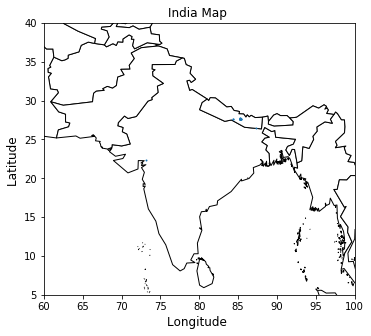

In [18]:
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data
base=wrld_simpl.plot(color='white', edgecolor='black', figsize=(9,5))
alty_gbif.plot(ax=base, markersize=1)
base.set_xlim(60,100)
base.set_ylim(5,40)
plt.title ('India Map ', fontsize =12)
plt.xlabel ('Longitude ', size =12)
plt.ylabel ('Latitude ', size =12)

World map data has been retrived from the site - https://github.com/nasa/World-Wind-Java. Data is in the shape file with extension <i>.shp</i>. The shape file contains a column of geometry as polygons, area of regions and so on.

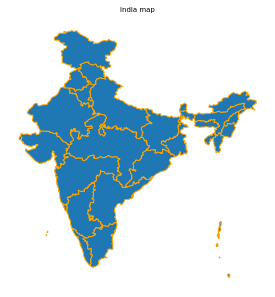

In [19]:
india=gpd.read_file(r'E:\r\cmip5\India Shape\india_st.shp')
india.plot(figsize=(5,5), edgecolor='orange')
plt.title('India map', fontsize=7)
plt.axis('off')
plt.savefig('india map.jpeg', dpi=500)

In [20]:
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Since the shapefile contains geometry. We can visualize the data on the world map.

Text(39.875, 0.5, 'Latitude')

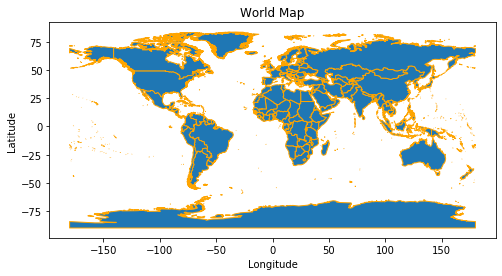

In [21]:
wrld_simpl.plot(figsize=(8,8), edgecolor = 'orange')
plt.title('World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

<p style='text-align: justify;'>We focused globally. With the view on the below map you can see, Alternanthera <i>Philoxeroides</i> located over the map</p>

Text(48.875, 0.5, 'Latitude ')

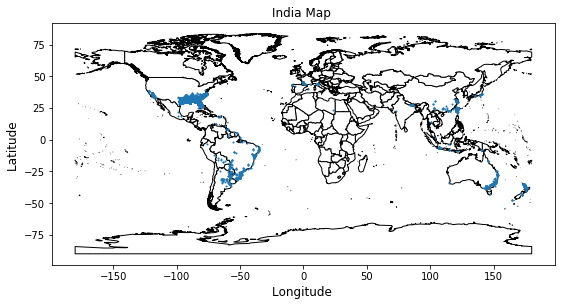

In [22]:
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data
base=wrld_simpl.plot(color='white', edgecolor='black', figsize=(9,5))
alty_gbif.plot(ax=base, markersize=1)
plt.title ('India Map ', fontsize =12)
plt.xlabel ('Longitude ', size =12)
plt.ylabel ('Latitude ', size =12)

<p style='text-align: justify;'>In the following, we represent the regions by transparent square. They are nothing but the approximate extent of SouthAmerica and India. The extent has been created here with visual inspection by looking into the world map. However, extent can be extracted from the data points of occurrence species located in SouthAmercia. Extent of regions will be extracted in further code with the explanations.</p>

Text(48.875, 0.5, 'Latitude ')

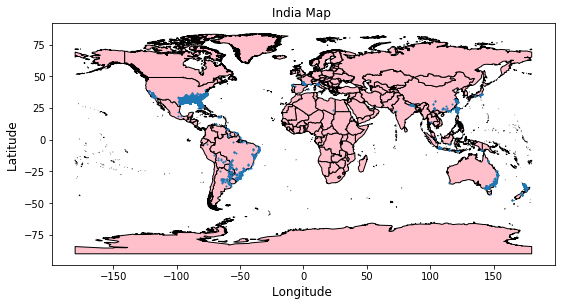

In [23]:
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data
base=wrld_simpl.plot(color='pink', edgecolor='black', figsize=(9,5))
alty_gbif.plot(ax=base, markersize=1)
plt.title ('India Map ', fontsize =12)
plt.xlabel ('Longitude ', size =12)
plt.ylabel ('Latitude ', size =12)

Text(48.875, 0.5, 'Latitude ')

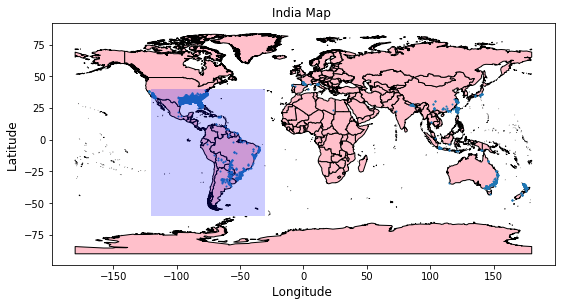

In [24]:
polys1 = gpd.GeoSeries([Polygon([(-120,-60),(-120,40),(-30,40),(-30,-60)])])
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data
base=wrld_simpl.plot(color='pink', edgecolor='black', figsize=(9,5))
alty_gbif.plot(ax=base, markersize=1)
polys1.plot (ax=base , color ='blue', alpha =0.2)
plt.title ('India Map ', fontsize =12)
plt.xlabel ('Longitude ', size =12)
plt.ylabel ('Latitude ', size =12)

Text(48.875, 0.5, 'Latitude ')

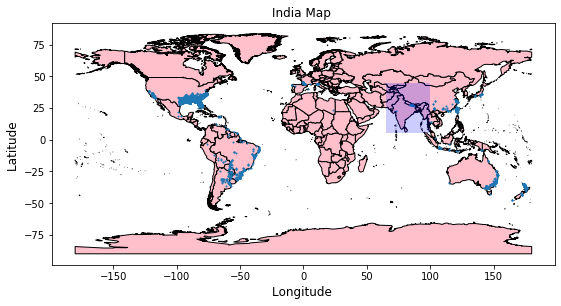

In [25]:
polys2 = gpd.GeoSeries([Polygon([(65,5),(65,45),(100,45),(100,5)])])
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data
base=wrld_simpl.plot(color='pink', edgecolor='black', figsize=(9,5))
alty_gbif.plot(ax=base, markersize=1)
polys2.plot (ax=base , color ='blue', alpha =0.2)
plt.title ('India Map ', fontsize =12)
plt.xlabel ('Longitude ', size =12)
plt.ylabel ('Latitude ', size =12)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Work on Duplicacy

In [26]:
## duplicated rows of lon-lat columns for South America
dups=alty_gbif.duplicated(subset=('lon','lat')) 
#sum(dups) # total no. of duplicates

In [27]:
# dropping duplicated rows
alty_gbif=alty_gbif.drop_duplicates(subset=('lon','lat'),inplace=False)
alty_gbif.head()

,species,lon,lat,geometry
1,Alternanthera philoxeroides,174.534784,-35.623341,POINT (174.53478 -35.62334)
2,Alternanthera philoxeroides,174.533840,-35.622136,POINT (174.53384 -35.62214)
3,Alternanthera philoxeroides,174.705837,-36.917413,POINT (174.70584 -36.91741)
4,Alternanthera philoxeroides,120.790303,24.407939,POINT (120.79030 24.40794)
5,Alternanthera philoxeroides,-88.541885,30.415394,POINT (-88.54188 30.41539)


In [28]:
alty_gbif=alty_gbif.set_index([pd.Index(np.arange(0,len(alty_gbif)))]) # Setting index

In [29]:
alty_gbif.crs = from_epsg(4326) 
alty_gbif.crs # displays coordinate reference system

E:\spatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
alty_gbif.to_file('alty_gbif_process.shp')